# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Regression
### VIDEO: Multiple regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
## example: effects of sleep and study hours on exam scores
### create the data

exam_scores = []
for ei in range(5):
    exam_scores = np.hstack((exam_scores,60*np.ones(6)+np.linspace(-1,5,6)*ei))

hours_studied = np.tile(np.linspace(2,8,6),5)
ave_sleep_hrs = np.linspace(6,10,30)


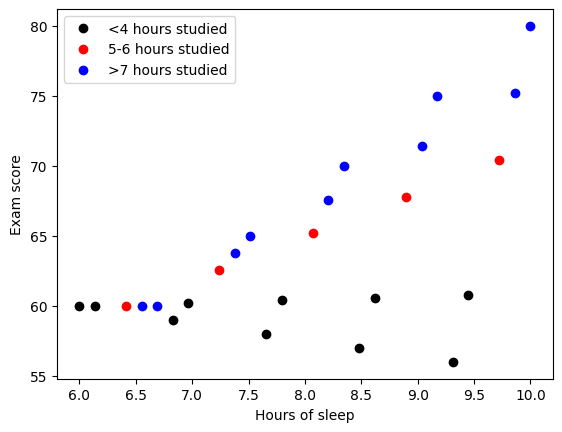

In [3]:
## plot the data

### stratify by hours studied

# fewer than 4 hours studied
plotidx = hours_studied<4.1
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ko',markerfacecolor='k')

# 5-6 hours studied
plotidx = np.logical_and(hours_studied>4.9, hours_studied<6.1)
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'ro',markerfacecolor='r')

# more than 6 hours
plotidx = hours_studied>6
plt.plot(ave_sleep_hrs[plotidx],exam_scores[plotidx],'bo',markerfacecolor='b')

plt.xlabel('Hours of sleep')
plt.ylabel('Exam score')
plt.legend(('<4 hours studied','5-6 hours studied','>7 hours studied'))
plt.show()


In [4]:
## multiple regression 

# build the design matrix
desmat = np.vstack((np.ones((30,)),ave_sleep_hrs,hours_studied,ave_sleep_hrs*hours_studied)).T

multireg = sm.OLS(endog=exam_scores, exog=desmat).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           6.74e-28
Time:                        21:21:46   Log-Likelihood:                -21.269
No. Observations:                  30   AIC:                             50.54
Df Residuals:                      26   BIC:                             56.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4315      1.700     48.491      0.000      78.937      85.926
x1            -3.4511      0.215    -16.087      0.000      -3.892      -3.010
x2            -7.6663      0.321    -23.916      0.000      -8.325      -7.007
x3             1.1736      0.040     29.623      0.000       1.092       1.255
==============================================================================
Omnibus:                       10.899   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.273
Skew:                          -0.438   Prob(JB):                        0.195
Kurtosis:                       1.640   Cond. No.                         821.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# without the interaction term

multireg = sm.OLS(endog=exam_scores, exog=desmat[:,0:-1]).fit()
multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     39.86
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           8.76e-09
Time:                        21:22:37   Log-Likelihood:                -74.492
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0556      3.832      9.409      0.000      28.193      43.918
x1             2.4167      0.477      5.071      0.000       1.439       3.395
x2             1.7222      0.278      6.203      0.000       1.153       2.292
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.004
Skew:                           0.000   Prob(JB):                        0.998
Kurtosis:                       2.943   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# inspect the correlations of the IVs
np.corrcoef(desmat[:,1:].T)

array([[1.        , 0.19731231, 0.49270769],
       [0.19731231, 1.        , 0.94068915],
       [0.49270769, 0.94068915, 1.        ]])